<a href="https://colab.research.google.com/github/TanuRajput110/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Github_NetFlix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM STATEMENT**

####This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
####In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

####Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attributes' Information**

####1. show_id : Unique ID for every Movie / Tv Show

####2. type : Identifier - A Movie or TV Show

####3. title : Title of the Movie / Tv Show

####4. director : Director of the Movie

####5. cast : Actors involved in the movie / show

####6. country : Country where the movie / show was produced

####7. date_added : Date it was added on Netflix

####8. release_year : Actual Releaseyear of the movie / show

####9. rating : TV Rating of the movie / show

####10. duration : Total Duration - in minutes or number of seasons

####11. listed_in : Genere

####12. description: The Summary description



---



 ### **IMPORTING REQUIRED LIBRARIES**

In [6]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import collections
from plotly.offline import init_notebook_mode, iplot

from nltk.corpus import stopwords  # importing stopwords module to deal with the stopwords
from nltk import word_tokenize,sent_tokenize # For tokenization
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer
from nltk.stem.snowball import SnowballStemmer # snowballstemmer
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# For Named Entity Recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold


# stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from collections import Counter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Do

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# installing a package called 'neattext' for cleaning textual data and text preprocessing.
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# importing neattext's functions
import neattext.functions as nfx

In [9]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# loading the dataset
data= pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering - Tanu Rajput/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
data_df = data.copy()
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
# seeing the first 5 rows of the dataset
data_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
# seeing the last 5 rows of the dataset
data_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [13]:
# checking the shape of the dataset
data_df.shape

(7787, 12)

In [14]:
# DataFrame columns
data_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# checking the data types of the attributes
data_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [16]:
# changing the data type of the date column from object to datetime
data_df['date_added']=pd.to_datetime(data_df['date_added'])

In [17]:
# rechecking the data types of the attributes after changes.
data_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [18]:
print("STATISTICAL INFORMATION")
print()
pd.DataFrame(data = data_df.describe())

STATISTICAL INFORMATION



,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [19]:
# Description of the dataset
def information(data):
    print(f"Dataset Shape: {data.shape}")
    information = pd.DataFrame(data.dtypes,columns=['dtypes']).reset_index()
    information['Name'] = information['index']
    information= information[['Name','dtypes']]
    information['Missing'] = data.isnull().sum().values    
    information['Uniques'] = data.nunique().values
    return information
result = information(data_df).sort_values('Missing', ascending= False)
print(result)

Dataset Shape: (7787, 12)
            Name          dtypes  Missing  Uniques
3       director          object     2389     4049
4           cast          object      718     6831
5        country          object      507      681
6     date_added  datetime64[ns]       10     1512
8         rating          object        7       14
0        show_id          object        0     7787
1           type          object        0        2
2          title          object        0     7787
7   release_year           int64        0       73
9       duration          object        0      216
10     listed_in          object        0      492
11   description          object        0     7769


In [20]:
# checking the total number of null values in each attribute.
data_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

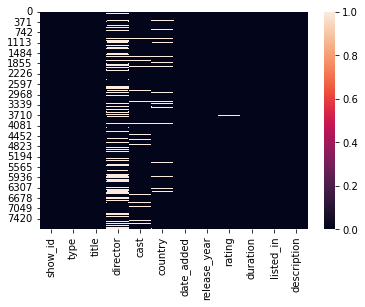

In [21]:
# visualizing the null values with the help of heatmap
sns.heatmap(data_df.isnull())



---



### **NULL VALUE TREATMENT**

In [22]:
# Let us the null values of each attribute in terms of percentage.
data_df.isnull().sum()/data_df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### **Observation and solution:**
#### 1. **Rating** = We can see from the above, the percentage of null values in this rating attribute is 0.0898. So we decided to replace the null values with the most frequent value of rating column. and it is **TV-MA**.

#### 2. **CAST** = Cast attribute has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform Exploratory Data Analysis.

#### 3. **DIRECTOR** = This attribute contains more than 30% missing values. And we have decided to drop this column completely as it not relevant for this project.

#### 4. **DATE_ADDED** = around 0.13 percent of date data are missing so we decided to drop the null values.

#### 5. **COUNTRY** = In this attribute, we decided to do the same thing as we are going to do with the RATING attribute. Replacing null values with the MODE value.

In [23]:
# treating the null values according to the solution we decided mentioned above.
data_df['rating'].replace(np.nan, 'TV-MA',inplace  = True) # replacing nan values with TV-MA
data_df['country'].replace(np.nan, 'United States',inplace  = True) # replacing NaN with mode value = 'United States'
data_df['cast'].replace(np.nan, 'missing info',inplace  = True)
data_df.drop(['director'],axis=1, inplace=True) # dropping the director column


In [24]:
# Checking the NaN values in data_added attribute
data_df[data_df['date_added'].isna()]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,Igor Dmitriev,United States,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [25]:
# dropping the NaN values in date_added attribute
data_df = data_df[data_df['date_added'].notna()]
data_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [26]:
# seeing the count of the values of TYPE attribute
data_df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [27]:
# changing all characters in the title attribute to lower
data_df['title'].str.lower()

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       zozo
7783                                     zubaan
7784                          zulu man in japan
7785                      zumbo's just desserts
7786    zz top: that little ol' band from texas
Name: title, Length: 7777, dtype: object

In [28]:
# if any values in the title attribute contains special characters then removing them with the help of neattext functions = remove_special_characters.
data_df['title']=data_df['title'].str.lower().apply(lambda x :nfx.remove_special_characters(x))

In [29]:
# if any values in the title attribute contains stop words then removing them with the help of neattext functions = remove_stopwords
data_df['title']=data_df['title'].str.lower().apply(lambda x :nfx.remove_stopwords(x))

In [30]:
#creating a cast column again by splitting the values with the comma
data_df['cast_name'] = data_df['cast'].apply(lambda x :  x.split(','))

In [31]:
# to check whether the special characters and stop words were removed or not.
data_df['title'].unique
# we can see that special character were actually removed if we compare above result and this

<bound method Series.unique of 0                             3
1                           719
2                          2359
3                             9
4                            21
                 ...           
7782                       zozo
7783                     zubaan
7784             zulu man japan
7785            zumbos desserts
7786    zz little ol band texas
Name: title, Length: 7777, dtype: object>

In [32]:
# rechecking the attributes that still if there are any null values in each attribute
data_df.isnull().any()

show_id         False
type            False
title           False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
cast_name       False
dtype: bool

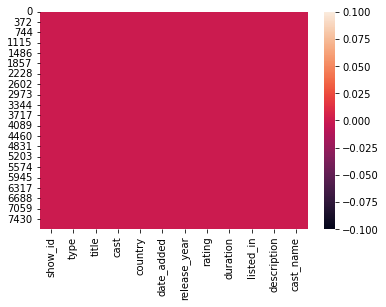

In [33]:
# visualizing the attributes with NO NULL VALUES with the help of heatmap
sns.heatmap(data_df.isnull())

### Observation: We can see in the heatmap that there are no missing values in any attribute. Hence we treated null values properly.




---



### **Spitting the values of the TYPE content into MOVIES and TV Shows**

In [34]:
# Movies content data
movie_df = data_df[data_df['type']=='Movie'].copy()
movie_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name
1,s2,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...","[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A..."


In [35]:
# TV shows content
tv_show_df= data_df[data_df['type']=='TV Show'].copy()
tv_show_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name
0,s1,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes..."
5,s6,TV Show,46,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir..."
11,s12,TV Show,1983,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...","[Robert Więckiewicz, Maciej Musiał, Michalin..."
12,s13,TV Show,1994,missing info,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,[missing info]
16,s17,TV Show,feb09,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...","[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi..."


In [36]:
# doing some preprocessing 
movie_df.duration = movie_df.duration.str.replace('min','').astype(int) # replacing the word min with space and changing those values into integer data type
tv_show_df.rename(columns={'duration':'seasons'}, inplace=True) # renaming duration to seasons
tv_show_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True) 
tv_show_df.seasons = tv_show_df.seasons.str.replace(' Seasons','').astype(int) # replacing seasons with space and changing those values into integer data type.

In [37]:
# extracting the year and adding year values in the created column
data_df['year_added'] = pd.DatetimeIndex(data_df['date_added']).year
movie_df['year_added'] = pd.DatetimeIndex(movie_df['date_added']).year
tv_show_df['year_added'] = pd.DatetimeIndex(tv_show_df['date_added']).year

In [38]:
# extracting the month and adding month values in the created column
tv_show_df['month_added'] = tv_show_df['date_added'].dt.month
movie_df['month_added'] = movie_df['date_added'].dt.month

In [39]:
movie_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,year_added,month_added
1,s2,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",2016,12
2,s3,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",2018,12
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",2017,11
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",2020,1
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...","[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",2020,6


In [40]:
data_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_name,year_added
0,s1,TV Show,3,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[João Miguel, Bianca Comparato, Michel Gomes...",2020
1,s2,Movie,719,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",2016
2,s3,Movie,2359,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","[Tedd Chan, Stella Chung, Henley Hii, Lawre...",2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[Elijah Wood, John C. Reilly, Jennifer Conne...",2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",2020




---



# **EXPLORATORY DATA ANALYSIS**

### 1. **Visualizing the distribution of duration attribute** 

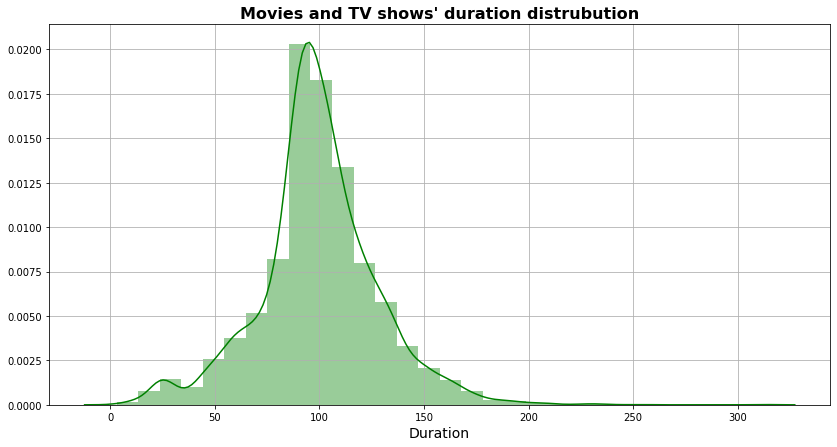

In [41]:
# duration distribution
plt.figure(figsize=(14, 7))
sns.distplot(movie_df['duration'], bins=30,color='Green').set(ylabel=None)
plt.title("Movies and TV shows' duration distrubution", fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.grid()
plt.show()

### Observation:
#### 1. This giving a bell curve shaped. We can see that the average duration of the movies as well as tv shows is  100mins.

### **2. Percentage distribution of content among all the countries**

In [42]:
country = data_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'darkred', width = 2)))
fig.show()

### Observation:
#### This pie chart tells us that 53.9% of the producers who produced Netflix movies/shows are from United States followed by India around 16.3%

### **3. Top 10 countries which have highest count of Type content from.**

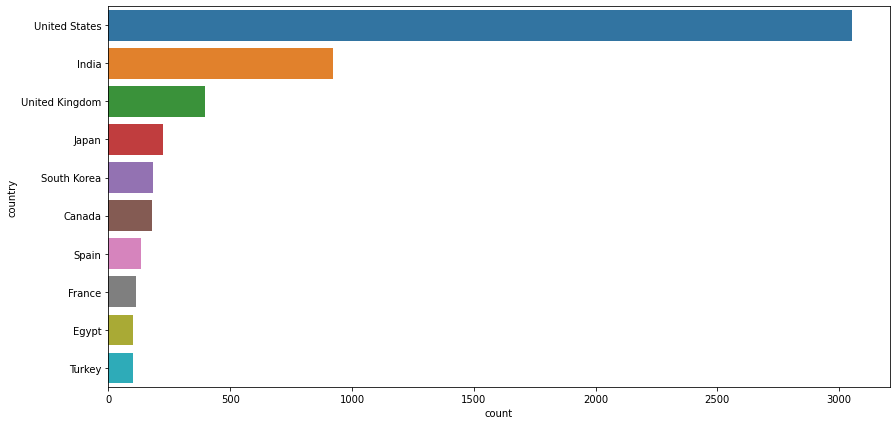

In [43]:
# Plotting the column chart which tells us the count of the Type content of each country.
plt.figure(figsize=(14, 7))
sns.countplot(y ='country', data = data_df , palette="tab10", order=data_df['country'].value_counts().index[0:10] )

###Observation:
####1. We can see the count of the type content is high from United States
####2. India is in the second position regarding count of the type content.

###**4. Values count of Movies & TV Shows in the dataset**

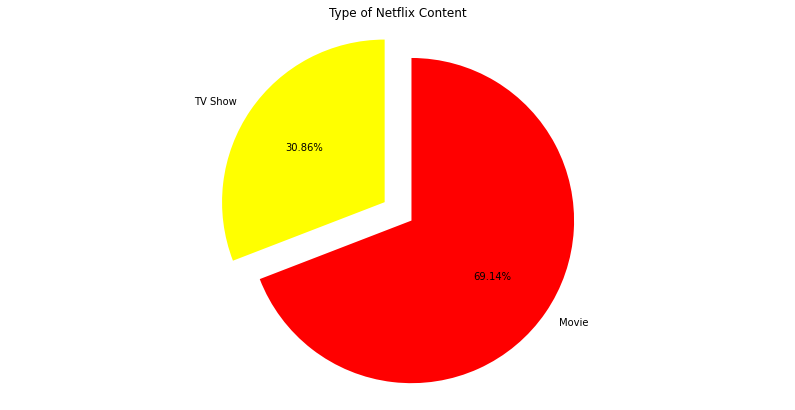

In [44]:
# Plotting a piechart which tells the values count of type content(Movies and TV Shows) in the dataset.
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(data_df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['Yellow','Red'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

###Observation:
####1. The percentage of distribution of Movies Content is 69.14%
####2. The percentage distribution of TV Shows Content is 30.86%

###**5. Count of the both Type Content, and TV Shows and Movies released over Years.**

In [45]:
type_content=[data_df,tv_show_df,movie_df]

2018    1120
2017    1012
2019     996
2016     881
2020     868
Name: release_year, dtype: int64


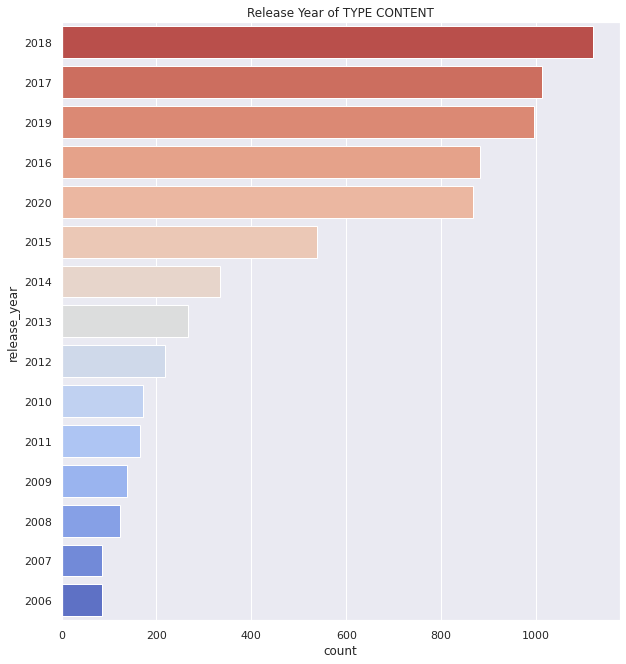

2020    457
2019    414
2018    386
2017    268
2016    239
Name: release_year, dtype: int64


<Figure size 432x288 with 0 Axes>

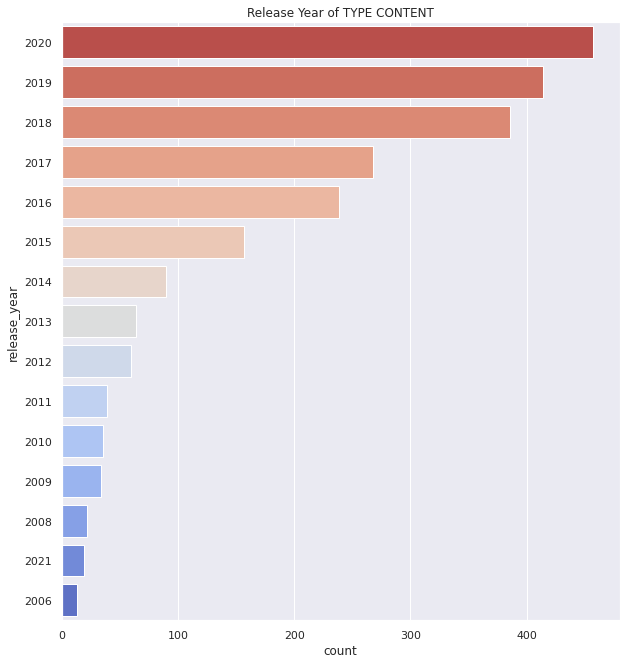

2017    744
2018    734
2016    642
2019    582
2020    411
Name: release_year, dtype: int64


<Figure size 432x288 with 0 Axes>

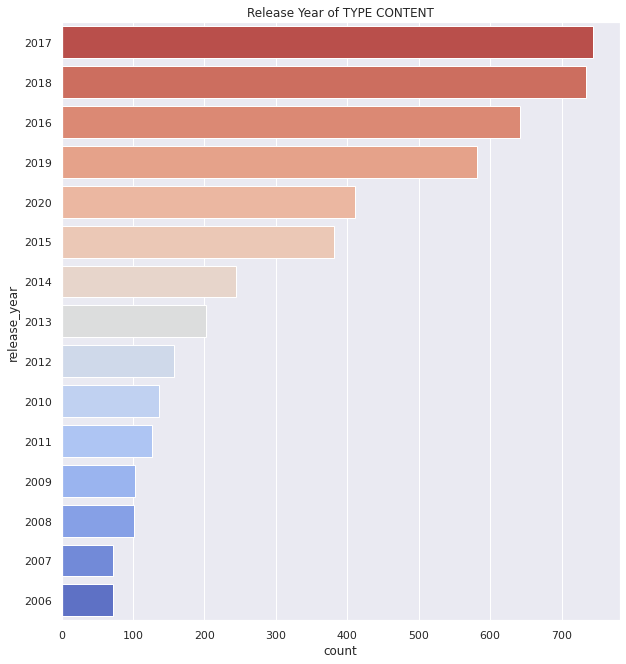

<Figure size 432x288 with 0 Axes>

In [46]:
for i in type_content:
  plt.figure(figsize=(10,11))
  sns.set(style="darkgrid")
  print(f"{i['release_year'].value_counts().head(5)}")
  ax = sns.countplot(y="release_year", data=i, palette="coolwarm_r", order=i['release_year'].value_counts().index[0:15])
  plt.title(f"Release Year of TYPE CONTENT")
  plt.show()
  plt.tight_layout()

###Observation:
####1. In the very first bar chart, this bar chart is of Total number of TYPE CONTENT count wrt release year and we can see that in the year 2018 the number of released TYPE CONTENT is high, i.e., 1120.
####2. In the second bar chart, It tells us the count of TV Shows released in NetFlix in the year 2020 is 457 which is high count.
####3. The third bar chart, it tells us the count of Movies released in NetFlix in the year 2017 is high, which is 744.

### **6.  Plotting Line Chart to see the trend/count of the Netflix TYPE content(Movies/TV Shows) added over years.**

In [47]:
#plotting Line chart to see the trend/count of the Netflix TYPE content over the years 

#percent of total content
df_content = data_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))  

#percent of Tv Shows 
df_tv_shows = tv_show_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv_shows['percent'] = df_tv_shows['count'].apply(lambda x : 100*x/sum(df_tv_shows['count']))

#percent of Movies
df_movies = movie_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies['percent'] = df_movies['count'].apply(lambda x : 100*x/sum(df_movies['count']))


a = go.Scatter(x=df_movies['year_added'], y=df_movies["count"], name="Movies", marker=dict(color="royalblue"))
b = go.Scatter(x=df_tv_shows['year_added'], y=df_tv_shows["count"], name="TV Shows", marker=dict(color="red"))
c = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="gold"))

data = [a, b, c]

layout = go.Layout(title="Netflix content added over years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


###Observation:
####1. By seeing the line chart, we can tell that,
Orange line represents TOTAL Content, Blue line represents Movies content and Red line represents the TV Shows separately and all of the three lines tells that highest count of the content is between the year 2018 and 2020.


In [48]:
# let us see the unique values of the rating attribute
data_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

###**RATING AND THEIR MEANINGS**

####TV-Y7: Directed to Older Children

####TV-Y7 FV: Directed to Older Children - Fantasy Violence

####TV-G: General Audience

####TV-PG: Parental Guidance Suggested

####TV-14: Parents Strongly Cautioned

####TV-MA: Mature Audience Only

####G: General Audiences

####PG: Parental Guidance Suggested

####PG-13: Parents Strongly Cautioned

####R: Restricted

####NC-17: Clearly Adult

####NR :Not Rated



In [49]:
# Creating new column where we are giving appropriate names according to the suitable age to each official ratings
age_rating_names = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# adding a new column in the dataset which is replacing the original rating values with age_rating_names
data_df['age_rating'] = data_df['rating'].replace(age_rating_names)

# seeing the unique values of age_rating attribute
data_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

###**7. Total count of the TYPE content wrt unique age_rating values (dataframe + barchart)**

In [50]:
# creating a dataframe which tells the count of the Both TYPE content wrt each unique age_rating values.
data_ratings = data_df.groupby(['age_rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
data_ratings.style.background_gradient(cmap='Greens')

,age_rating,count
0,Adults,3624
4,Young Adults,1928
2,Older Kids,1327
1,Kids,512
3,Teens,386


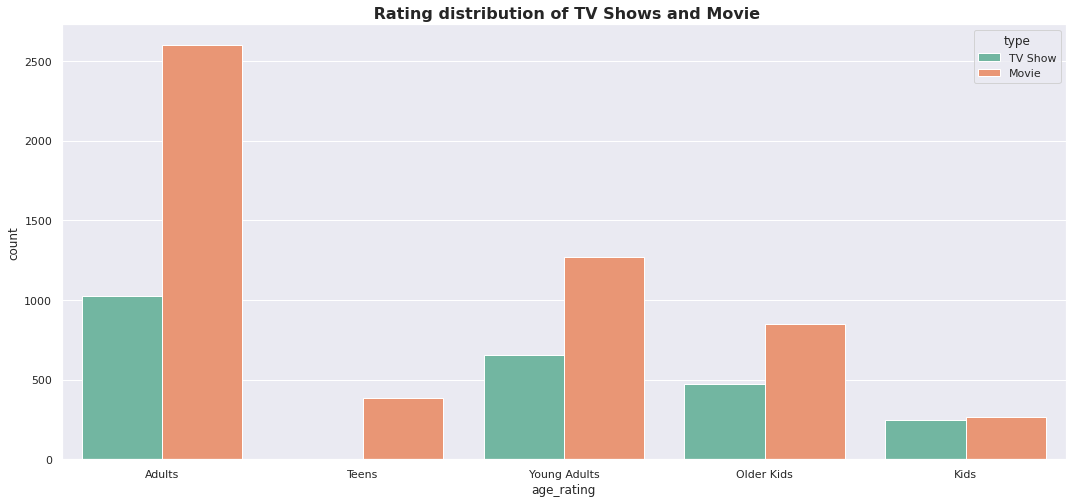

In [51]:
# creating a bar chart which tells the number of MOVIES and TV shows content wrt to unique age_rating values
plt.figure(figsize=(18,8))
sns.countplot(x='age_rating',hue='type',data=data_df,palette="Set2")
plt.title(' Rating distribution of TV Shows and Movie',size='16',fontweight="bold")
plt.show()

###Observation:
####**A. Dataframe's observation:**
####1. Dataframe shows the count of TOTAL content wrt each age_rating values. And the count of adult contents is high (3624) and lowest count is of teen contents (386)


####**B. Barchart's observation:**
####It clearly tells that the count of Adult movies is high which is more than 2500.
####There are no teen shows in Netflix, only teen movies.

### **8. TOP  Ratings wrt TV Shows count separately**

In [52]:
# creating a dataframe which shows the count of the TV shows wrt different ratings
TV_shows_rating = tv_show_df.groupby(['rating'])['type'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
TV_shows_rating.style.background_gradient(cmap='Greens')

,rating,count
4,TV-MA,1018
2,TV-14,656
5,TV-PG,299
7,TV-Y7,175
6,TV-Y,162
3,TV-G,83
0,NR,4
1,R,2
8,TV-Y7-FV,1


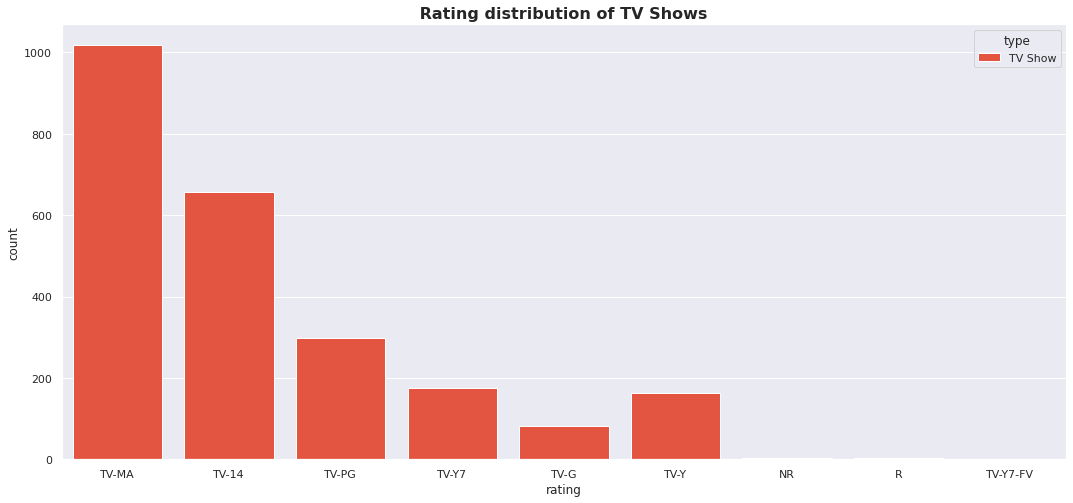

In [53]:
# creating a barchart which tells the count of TV shows content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=tv_show_df,palette="CMRmap")
plt.title(' Rating distribution of TV Shows ',size='16',fontweight="bold")
plt.show()

###Observation:
####1. As we already seen in the previous EDA barchart that the Adult rating count is high and here the same thing is concluded that the Adult contents of TV shows is high. = TV-MA = Mature Audience Only

###**9. TOP Ratings wrt Movies content separately**

In [54]:
# creating a dataframe which tells the count of the Movies content wrt ratings
movie_ratings = movie_df.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
movie_ratings.style.background_gradient(cmap='YlGnBu')

,rating,count
8,TV-MA,1850
6,TV-14,1272
5,R,663
9,TV-PG,505
4,PG-13,386
3,PG,247
10,TV-Y,117
7,TV-G,111
11,TV-Y7,95
2,NR,79


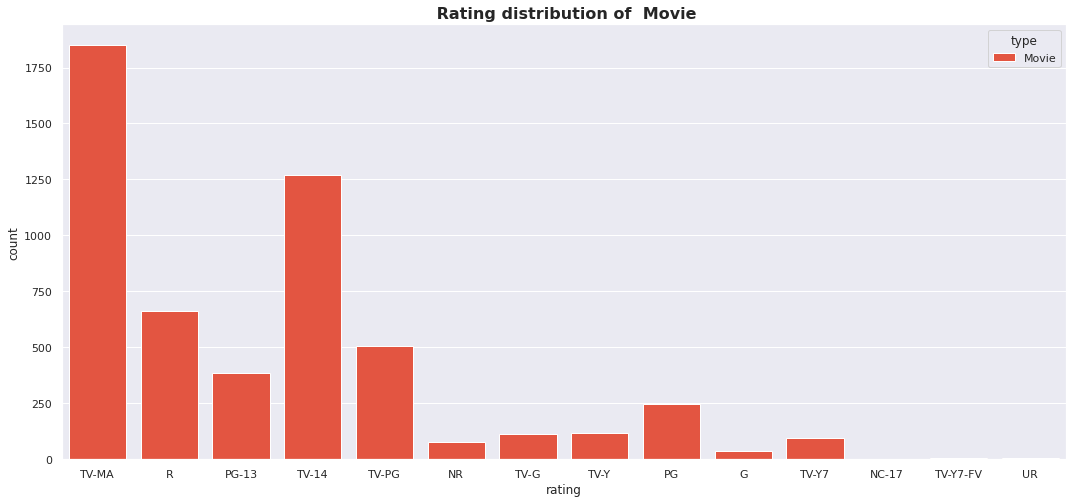

In [55]:
# plotting a barchart which tells the count of Movies content wrt ratings
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=movie_df,palette="CMRmap")
plt.title(' Rating distribution of  Movie',size='16',fontweight="bold")
plt.show()

###Observation:
####1. As we already seen in the previous to previous EDA barchart, that the Adult rating count is high and here the same thing is concluded that the Adult contents of Movies is high. = TV-MA = Mature Audience Only

###**10. Top 5 movies with the highest movies duration length.**

In [56]:
# creating the dataframe to see the top 5 movies with highest movies duration length.
duration_vs_content = movie_df[movie_df['duration']>9]
long_shows_df = duration_vs_content[['title','duration']]
x=pd.DataFrame(long_shows_df.sort_values(by=['duration'],ascending=False))
x.set_index('title')
print(x)

                                               title  duration
957                        black mirror bandersnatch       312
6850                                 school mischief       253
4490                                     longer kids       237
3694                                      lock girls       233
5108                                     raya sakina       230
...                                              ...       ...
7771                                            zion        12
1504                         cosmos laundromat cycle        12
1175                     calico critters town dreams        11
1176  calico critters everyones big dream flying sky        11
463             american factory conversation obamas        10

[5373 rows x 2 columns]


<Figure size 1296x576 with 0 Axes>

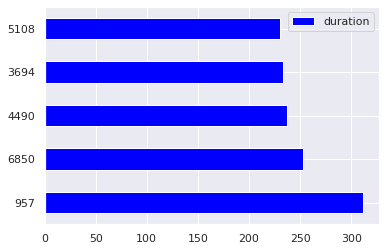

In [57]:
# plotting a bar chart to see the movie id and their respective duration length
plt.figure(figsize=(18,8))
x.head().plot.barh(color=['blue'])
plt.show()

###Observation:
####1. Movie id 957 have the duration more than 300mins duration length.
####2. In the 5th position, movie id 5108 have the duration length around 230mins